In [1]:
!pip install scipy

In [2]:
!pip install researchpy

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [4]:
bike_data = pd.read_csv('../../datasets/day.csv')

bike_data.shape

(731, 16)

In [5]:
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_data = bike_data[['season',
                       'mnth',
                       'holiday',
                       'workingday',
                       'weathersit',
                       'temp',
                       'cnt']]

In [7]:
bike_data.to_csv('../../datasets/bike_data_pro.csv', index=False)

In [8]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [9]:
bike_data['season'].unique()

array([1, 2, 3, 4])

In [10]:
bike_data['workingday'].unique()

array([0, 1])

In [11]:
bike_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [12]:
bike_data.shape

(731, 7)

In [13]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


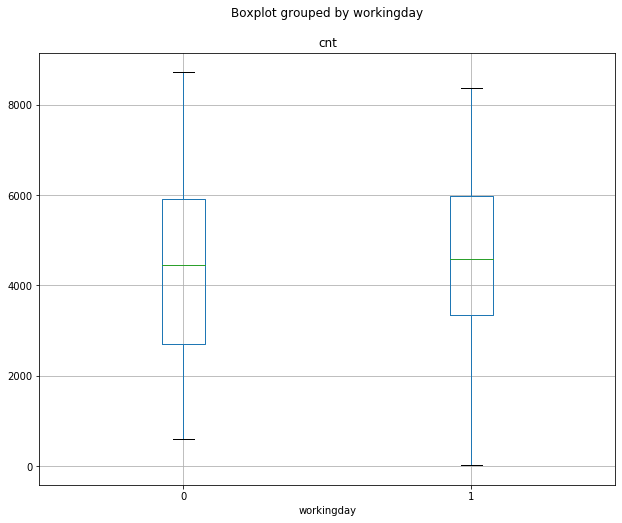

In [14]:
bike_data.boxplot(column=['cnt'], by='workingday', figsize=(10,8));

In [15]:
sample_01 = bike_data[(bike_data['workingday'] == 1)]
sample_02 = bike_data[(bike_data['workingday'] == 0)]

In [16]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [17]:
sample_01 = sample_01.sample(231)

In [18]:
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

### Check the variances of two groupes ##

In [21]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.384997082747361, pvalue=0.03680329258397745)

## The distribution of the residuals between the two groups should follow the normal distribution ##

(array([ 5.,  4., 21., 27., 35., 47., 42., 28., 15.,  7.]),
 array([-2.68829356, -2.1900685 , -1.69184344, -1.19361838, -0.69539332,
        -0.19716826,  0.3010568 ,  0.79928186,  1.29750692,  1.79573199,
         2.29395705]),
 <a list of 10 Patch objects>)

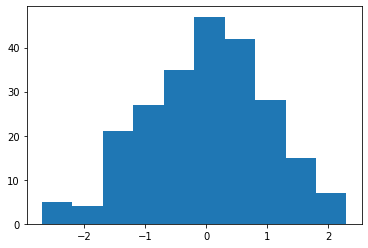

In [22]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))

plt.hist(diff)

### Generates a probability plot of sample data against the quantiles of a theoretical distribution ##

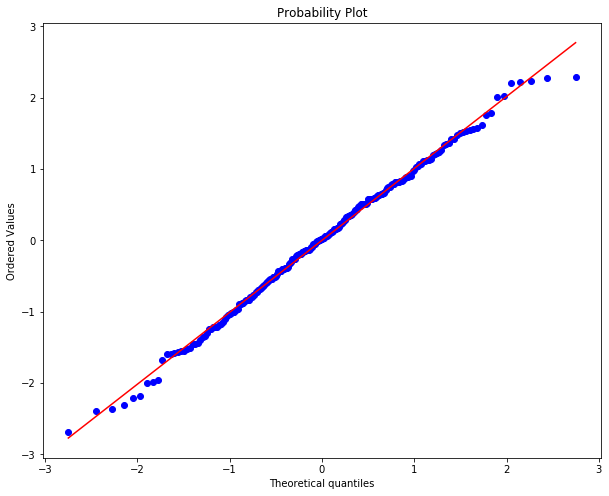

In [23]:
plt.figure(figsize=(10,8))
stats.probplot(diff, plot=plt, dist='norm')
plt.show()

### Shapiro-Wilk test for normality - if the test statistic is not sognofocant then population is normally distributed ##

In [24]:
stats.shapiro(diff)

(0.9948248267173767, 0.6208720207214355)

**p value is 62%, not significant**

**Time to perform independent T-Test**

In [25]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=2.1652748420966477, pvalue=0.03088001883487854)

In [26]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [28]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4723.047619,1842.222564,121.209346,4484.224994,4961.870244
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4526.608225,1957.794046,91.084822,4347.615326,4705.601124


In [29]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   392.8788
1      Degrees of freedom =   460.0000
2                       t =     2.1653
3   Two side test p value =     0.0309
4  Difference < 0 p value =     0.9846
5  Difference > 0 p value =     0.0154
6               Cohen's d =     0.2015
7               Hedge's g =     0.2011
8           Glass's delta =     0.2133
9                       r =     0.1004


In [30]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


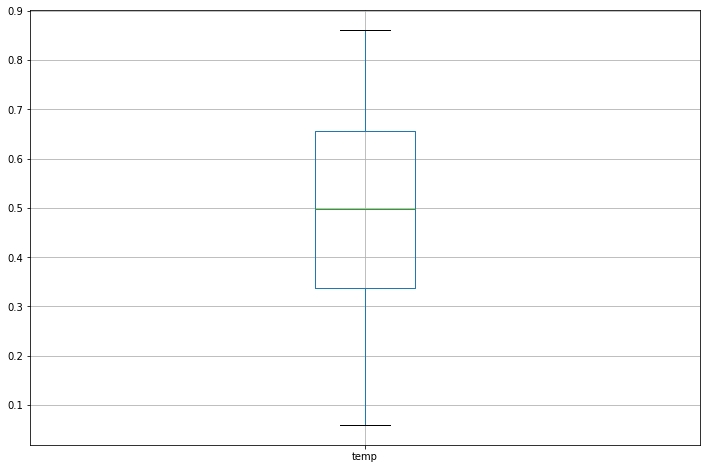

In [31]:
bike_data[['temp']].boxplot(figsize=(12,8))

In [32]:
bike_data['temp_category'] = bike_data['temp'] > bike_data['temp'].mean()

In [33]:
bike_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
591,3,8,0,1,1,0.726667,6784,True
538,3,6,0,1,1,0.777500,5823,True
252,3,9,0,0,1,0.660000,5345,True
659,4,10,0,0,1,0.464167,6824,False
271,4,9,0,1,1,0.616667,4839,True
417,1,2,0,1,1,0.395833,4773,False
526,2,6,0,0,1,0.726667,6598,True
706,4,12,0,1,2,0.320833,5008,False
573,3,7,0,1,1,0.781667,6904,True
645,4,10,0,0,2,0.415833,3510,False


In [34]:
bike_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


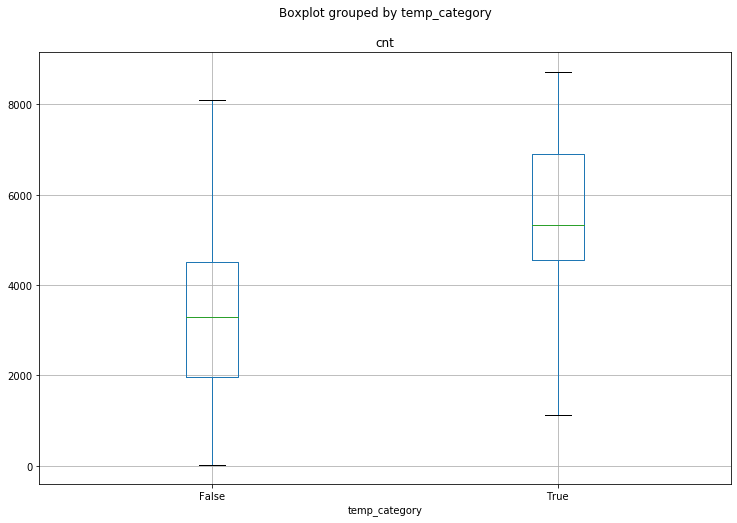

In [35]:
bike_data.boxplot(column=['cnt'], by='temp_category', figsize=(12,8))

In [36]:
sample_01 = bike_data[(bike_data['temp_category'] == True)]
sample_02 = bike_data[(bike_data['temp_category'] == False)]

In [37]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [38]:
sample_01 = sample_01.sample(364)
sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [39]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.575336119058301, pvalue=0.03276836031227438)

**p Value is 2%, levene test is significant**
*reject the null hypothesis, accept the alternative hypothesis*

(array([ 2., 10., 20., 42., 64., 69., 74., 46., 28.,  9.]),
 array([-3.05246525, -2.50770501, -1.96294478, -1.41818454, -0.8734243 ,
        -0.32866406,  0.21609617,  0.76085641,  1.30561665,  1.85037689,
         2.39513712]),
 <a list of 10 Patch objects>)

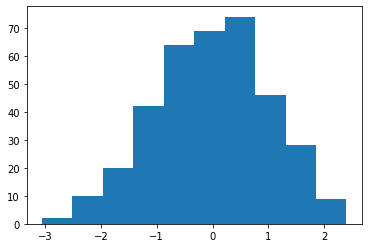

In [40]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

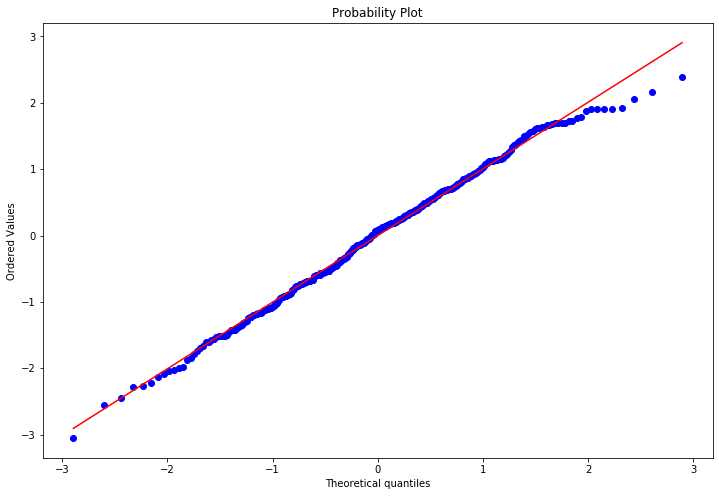

In [41]:
plt.figure(figsize=(12,8))
stats.probplot(diff, plot=plt)
plt.show()

In [42]:
stats.shapiro(diff)

(0.994188666343689, 0.1804940402507782)

In [43]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.857885628966596, pvalue=7.287066886893906e-65)

In [44]:
descriptive, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [45]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4723.047619,1842.222564,121.209346,4484.224994,4961.870244
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4526.608225,1957.794046,91.084822,4347.615326,4705.601124


In [46]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2220.7940
1      Degrees of freedom =    713.3176
2                       t =     18.8579
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3978
7               Hedge's g =      1.3964
8           Glass's delta =      1.5015
9                       r =      0.5768
